*Load in Libraries and Import Data*


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Read the CSV file
df = pd.read_csv("diabetes data.csv")

#Get Column Names so I can Decide What to Use for Regression
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


# Step #1

*Build Multivariate Logisitcal Regression Model*

In [5]:
#Creat Logisitc Regression using Logit & Varibles I Selected
model = logit('Diabetes_binary ~ Age + BMI + PhysActivity', data=df).fit()

#Print Summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.360588
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253676
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.1069
Time:                        03:17:16   Log-Likelihood:                -91474.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.0119      0.041   -147.335      0.000      -6.092      -5.932
Age              0.2208

Why Age, BMI, and Physical Activity?

---
I intentionally selected three predictor variables representing different categories relevant to diabetes risk:


**Modifiable Variables**

*  PhysActivity: This variable indicates whether the
individual engages in physical activity. It reflects behavioral factors that can influence diabetes risk.



* BMI: This variable can be partially dertimined by genetics due to things like body composition and metabalism but it can be changed through diet and lifestyle choices.

**Non-Modifiable Variable**

*  Age: This variable represents how old a person is, which cannot be changed by behavior or genetics.





I specifically chose two numeric variables and one bianary variable because:

*   Binary variables (PhysActivity) capture distinct yes/no health indicators, making it easy to interpret their individual impact on diabetes risk. For example, does participating in physical activity reduce diabtes risk
*  The numeric variables (BMI and Age) provides a continuous measure, offering more information about diabetes risk on a spectrum. For example, which ages or BMIs are most prone to diabetes.





*Create a Graph to Show the Distribution of BMIs and Ages in the Dataset*

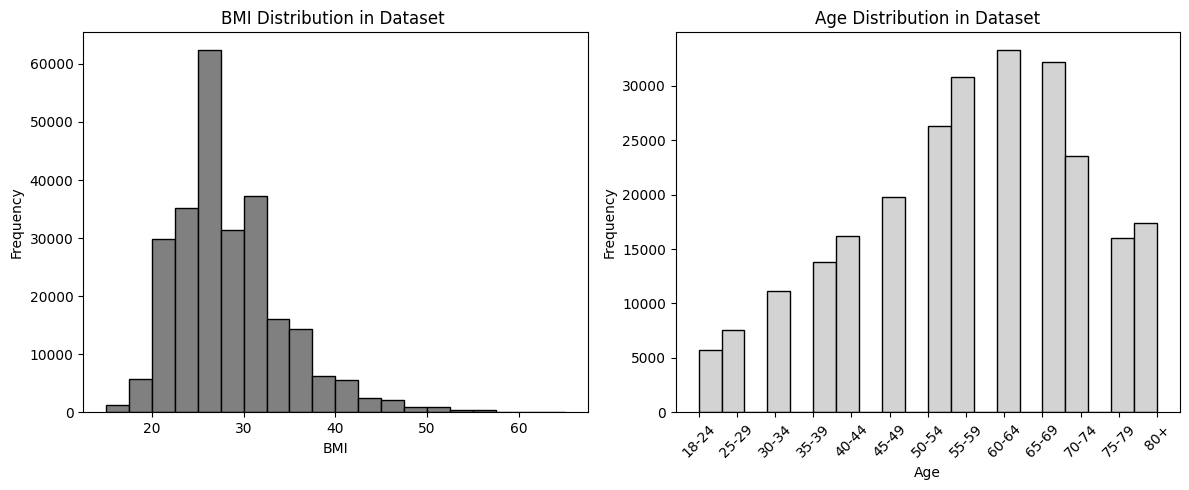

In [17]:
import matplotlib.pyplot as plt

# Create a single chart with 2 subplots side by side
plt.figure(figsize=(12, 5))  # Set overall figure size

# Plot histogram for BMI
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(df['BMI'], bins=20, color='grey', edgecolor='black', range=(15, 65))  # Set range from 15 to 65 to see data more clearly
plt.title('BMI Distribution in Dataset ')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plot histogram for Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(df['Age'], bins=20, color='lightgrey', edgecolor='black')
plt.title('Age Distribution in Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add custom labels for age ranges
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44',
    '45-49', '50-54', '55-59', '60-64', '65-69',
    '70-74', '75-79', '80+'
]

# Replace x-tick labels with age ranges
plt.xticks(ticks=range(1, 14), labels=age_labels, rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#Step Two

*Build The Same Model to Predict the Likelihood of Developing Diabetes due to The Variables*

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Select features (X) and the target variable (y)
X = df[['HighBP', 'BMI', 'PhysActivity']]  # Predictor variables
y = df['Diabetes_binary']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier for binary classification
clf = LogisticRegression()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)



*See if the Model's Predictions are Accurate*

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8600

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     43739
         1.0       0.40      0.03      0.06      6997

    accuracy                           0.86     50736
   macro avg       0.63      0.51      0.49     50736
weighted avg       0.80      0.86      0.80     50736



*See if Weighting the Class Helps Accuracy*

In [14]:
# Create a Logistic Regression classifier with class weights
clf_with_weights = LogisticRegression(class_weight='balanced')

# Train the model on the training data
clf_with_weights.fit(X_train, y_train)

# Make predictions on the test data
y_pred_with_weights = clf_with_weights.predict(X_test)

# Calculate accuracy
accuracy_with_weights = accuracy_score(y_test, y_pred_with_weights)
print(f"Accuracy (With Class Weights): {accuracy_with_weights:.4f}")

# Print classification report (precision, recall, F1-score)
print("\nClassification Report (With Class Weights):")
print(classification_report(y_test, y_pred_with_weights))

Accuracy (With Class Weights): 0.6597

Classification Report (With Class Weights):
              precision    recall  f1-score   support

         0.0       0.94      0.64      0.77     43739
         1.0       0.25      0.76      0.38      6997

    accuracy                           0.66     50736
   macro avg       0.60      0.70      0.57     50736
weighted avg       0.85      0.66      0.71     50736



*Create and Plot Confusion Matrixes*

[[43417   322]
 [ 6780   217]]


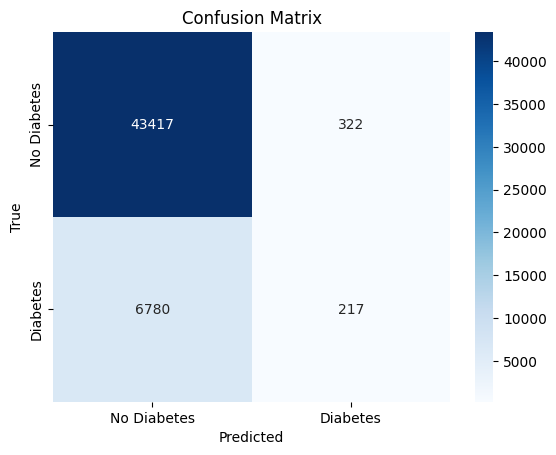

[[28183 15556]
 [ 1709  5288]]


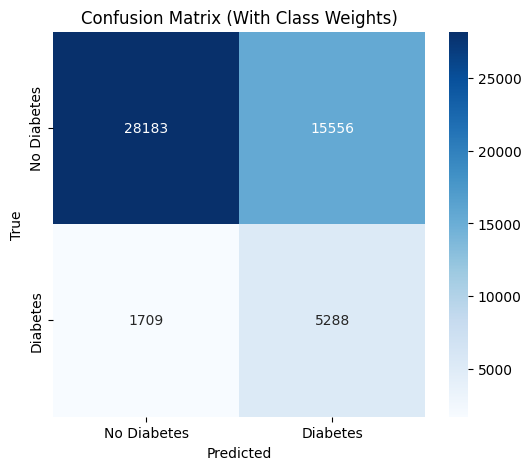

In [17]:
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create a confusion matrix for the model with class weights
cm_with_weights = confusion_matrix(y_test, y_pred_with_weights)
print(cm_with_weights)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_with_weights, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (With Class Weights)')
plt.show()

Which One Will I Use?

---
I will use the non-weighted model for predictions because
it is more accurate overall. It does miss more postive diabetes cases (actually many) but is very accurate at predicting non-diabetes cases. The weighted model on the other hand, predicts more false positives therefor I do not think it is very helpful.
